In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
haq = pd.read_excel('C:\\Users\\user\\Downloads\\(HAQ) Healthcare Access and Quality Index.xlsx')

In [3]:
haq.head()

,Country,2000,2005,2010,2015,2019
0,Afghanistan,37.8,41.4,44.7,47.6,28.866354
1,Albania,72.9,75.0,77.0,79.1,67.544392
2,Algeria,67.5,69.7,70.4,71.4,58.663453
3,Andorra,88.4,89.6,90.4,91.2,89.085367
4,Angola,47.8,48.9,51.1,55.3,29.302573


In [6]:
 df_melted = haq.melt(id_vars=['Country'], var_name='Year', value_name='Healthcare Access and Quality Index (HAQ)')
 # Replace 'no data' with NaN and convert Short-Cycle Tertiary to numeric
 df_melted['Healthcare Access and Quality Index (HAQ)'] = pd.to_numeric(df_melted['Healthcare Access and Quality Index (HAQ)'])
 # Reset index
 df_melted.reset_index(drop=True, inplace=True)

In [7]:
 df_melted.head()

,Country,Year,Healthcare Access and Quality Index (HAQ)
0,Afghanistan,2000,37.8
1,Albania,2000,72.9
2,Algeria,2000,67.5
3,Andorra,2000,88.4
4,Angola,2000,47.8


In [10]:
df_sorted = df_melted.sort_values(by=["Country", "Year"])
print(df_sorted)

         Country  Year  Healthcare Access and Quality Index (HAQ)
0    Afghanistan  2000                                  37.800000
191  Afghanistan  2005                                  41.400000
382  Afghanistan  2010                                  44.700000
573  Afghanistan  2015                                  47.600000
764  Afghanistan  2019                                  28.866354
..           ...   ...                                        ...
190     Zimbabwe  2000                                  63.500000
381     Zimbabwe  2005                                  64.000000
572     Zimbabwe  2010                                  63.600000
763     Zimbabwe  2015                                  66.600000
954     Zimbabwe  2019                                  28.577096

[955 rows x 3 columns]


In [11]:
df_sorted.head()

,Country,Year,Healthcare Access and Quality Index (HAQ)
0,Afghanistan,2000,37.800000
191,Afghanistan,2005,41.400000
382,Afghanistan,2010,44.700000
573,Afghanistan,2015,47.600000
764,Afghanistan,2019,28.866354


In [13]:
 df_sorted.to_excel("HAQ19_sorted.xlsx", index = False)

In [14]:
haqr= pd.read_excel('C:\\Users\\user\\Downloads\\HAQ19_sortedregion.xlsx')

In [15]:
haqr.head()

,Country,Year,Healthcare Access and Quality Index (HAQ),Region
0,Afghanistan,2000,37.800000,"Middle East, North Africa, Afghanistan & Pakistan"
1,Afghanistan,2005,41.400000,"Middle East, North Africa, Afghanistan & Pakistan"
2,Afghanistan,2010,44.700000,"Middle East, North Africa, Afghanistan & Pakistan"
3,Afghanistan,2015,47.600000,"Middle East, North Africa, Afghanistan & Pakistan"
4,Afghanistan,2019,28.866354,"Middle East, North Africa, Afghanistan & Pakistan"


C:\Users\user\AppData\Local\Temp\ipykernel_5292\2112311241.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("tab20", num_countries)


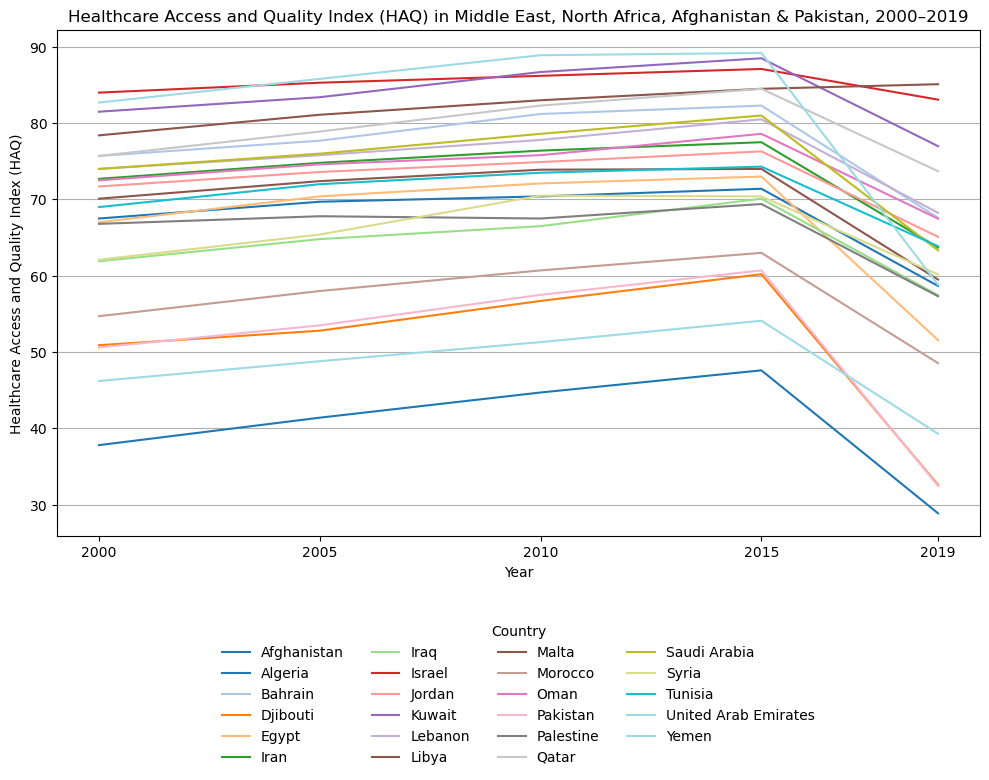

Saved graph as: healthcare_access_and_quality_index_rawMiddle_East,_North_Africa,_Afghanistan_&_Pakistan.png


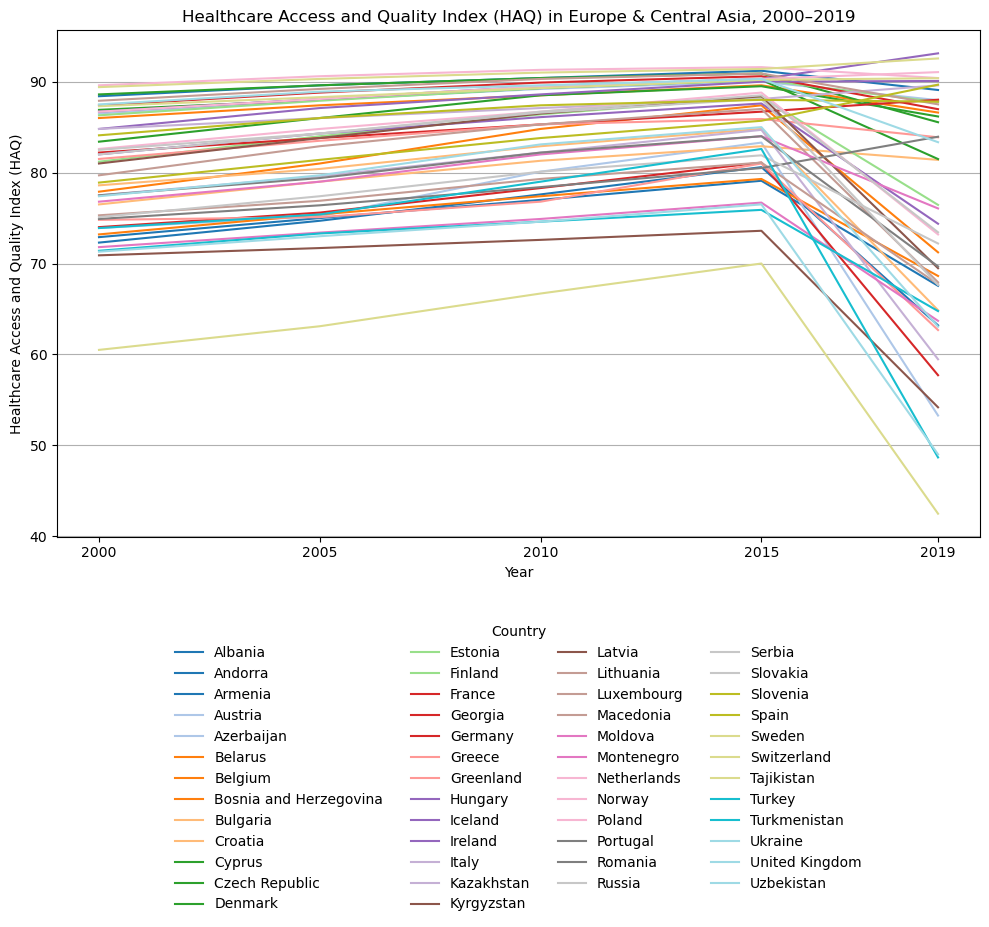

Saved graph as: healthcare_access_and_quality_index_rawEurope_&_Central_Asia.png


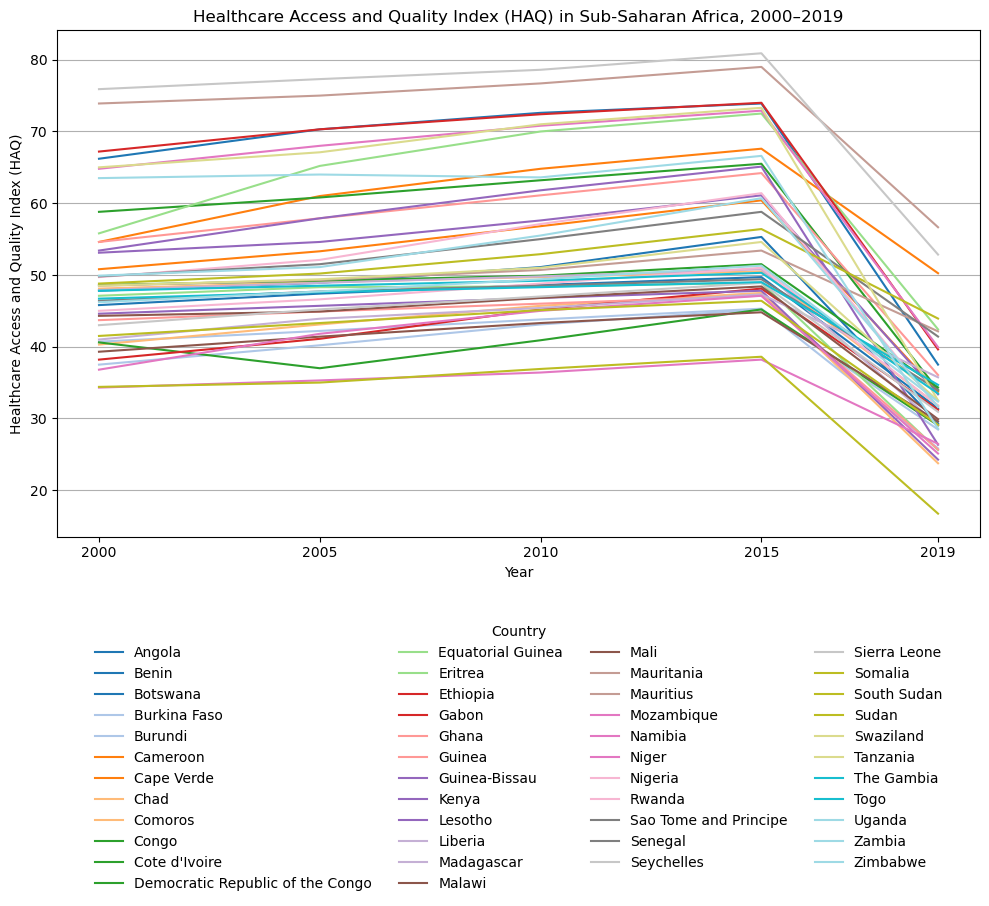

Saved graph as: healthcare_access_and_quality_index_rawSub-Saharan_Africa.png


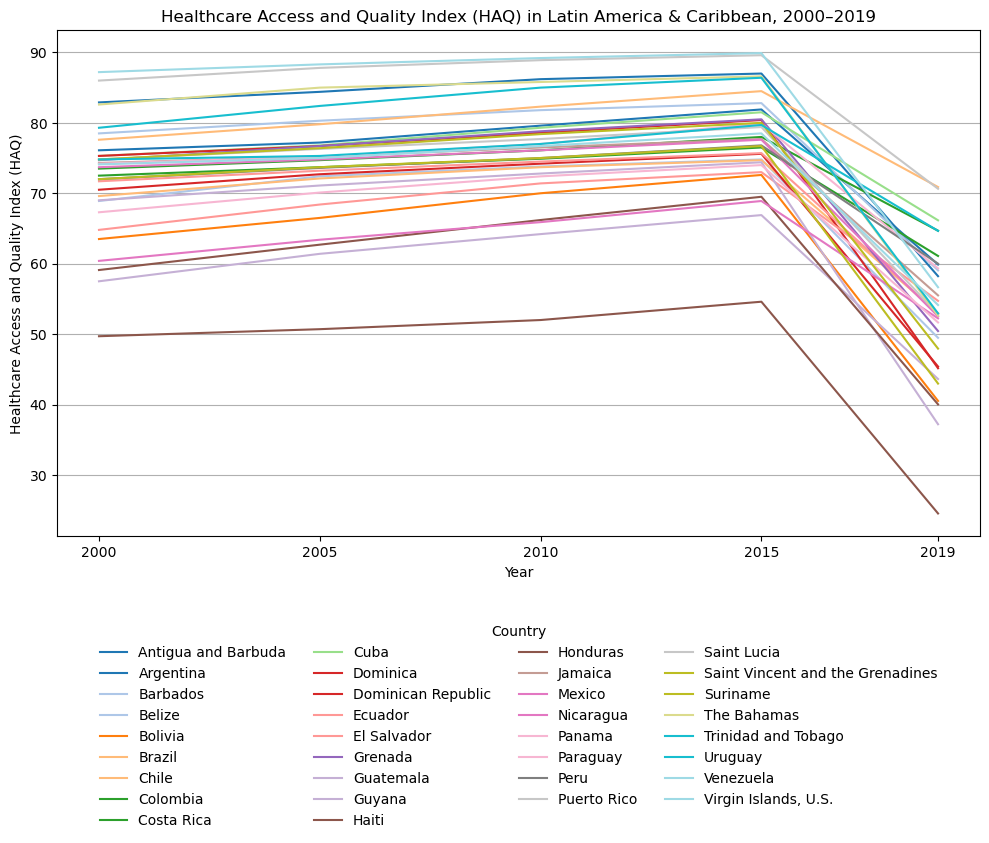

Saved graph as: healthcare_access_and_quality_index_rawLatin_America_&_Caribbean.png


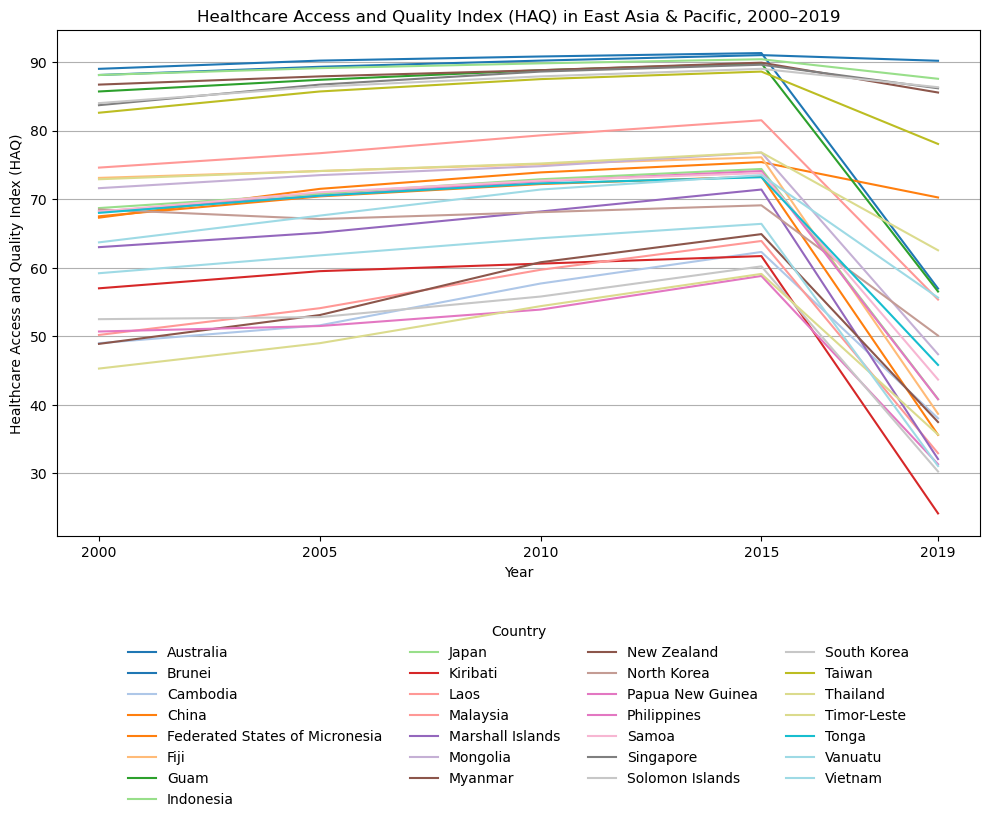

Saved graph as: healthcare_access_and_quality_index_rawEast_Asia_&_Pacific.png


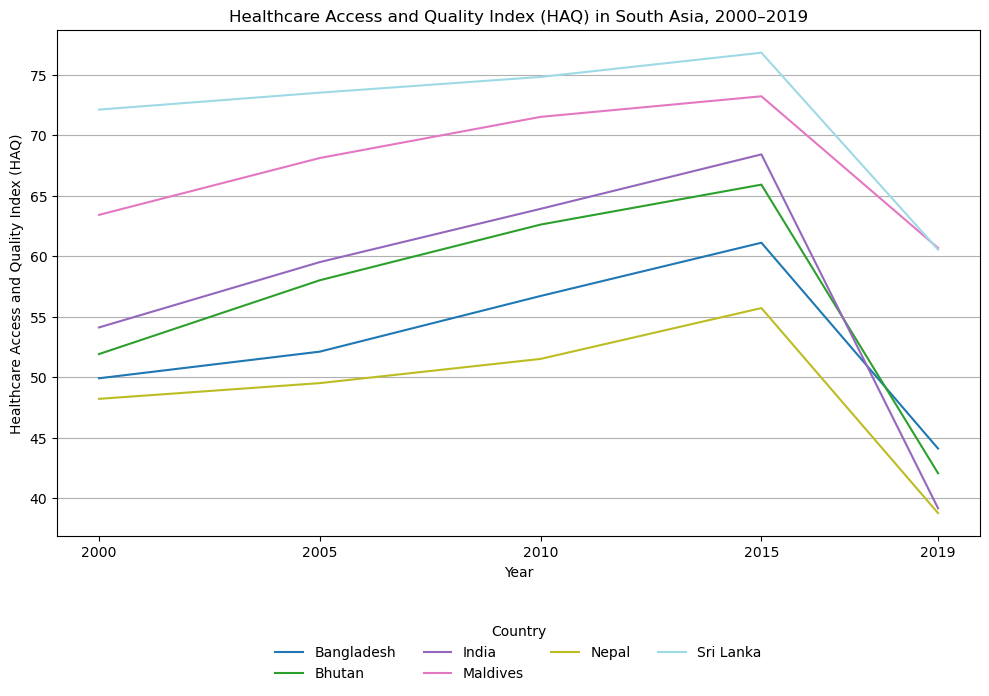

Saved graph as: healthcare_access_and_quality_index_rawSouth_Asia.png


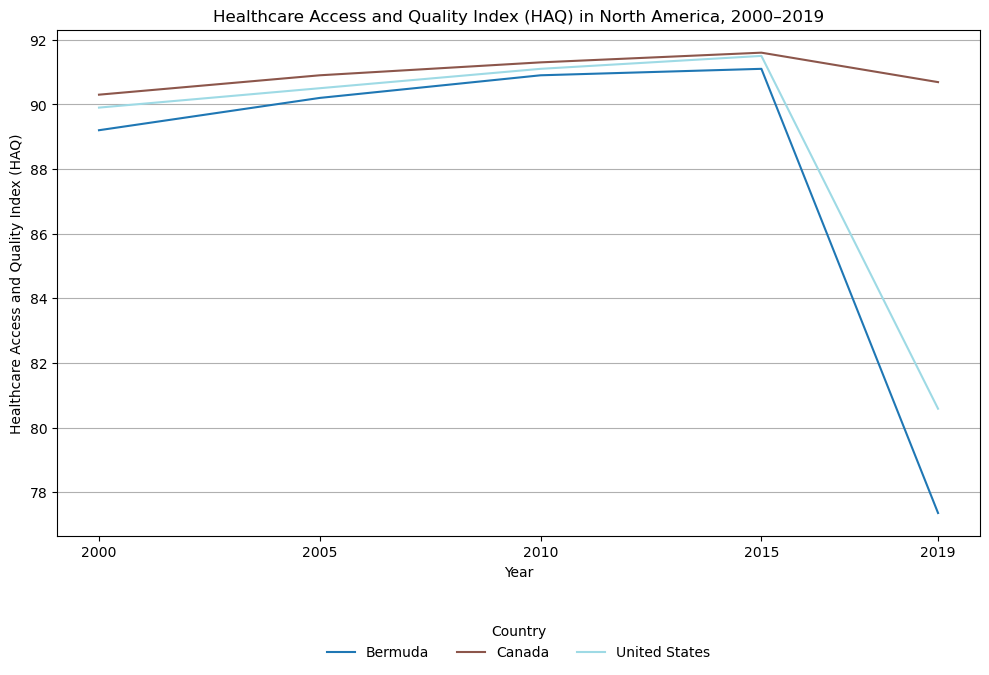

Saved graph as: healthcare_access_and_quality_index_rawNorth_America.png


In [22]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

haqr["Year"] = pd.to_numeric(haqr["Year"], errors="coerce").astype(int)

regions = haqr["Region"].unique()

for region in regions:
    regional_data = haqr[haqr["Region"] == region]

    countries = regional_data["Country"].unique()
    num_countries = len(countries)

    # Create distinct colors for all countries in the region
    colors = cm.get_cmap("tab20", num_countries)

    plt.figure(figsize=(10, 6))

    for i, country in enumerate(countries):
        country_data = regional_data[regional_data["Country"] == country]

        plt.plot(
            country_data["Year"],
            country_data["Healthcare Access and Quality Index (HAQ)"],
            linewidth=1.5,
            label=country,
            color=colors(i)     # <-- DISTINCT COLOR
        )

    # Titles and labels
    plt.title(f"Healthcare Access and Quality Index (HAQ) in {region}, 2000–2019")
    plt.xlabel("Year")
    plt.ylabel("Healthcare Access and Quality Index (HAQ)")

    # Force integer ticks
    years = sorted(regional_data["Year"].unique())
    plt.xticks(years)

    # Grid settings
    plt.grid(True)
    plt.grid(axis='x', linestyle='', alpha=0.5)

    plt.tight_layout()

    # Legend below the plot
    plt.legend(
        title="Country",
        loc="upper center",
        bbox_to_anchor=(0.5, -0.15),
        ncol=4,
        frameon=False
    )

    # Save the figure
    filename = f"healthcare_access_and_quality_index_raw{region.replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")

    plt.show()

    print("Saved graph as:", filename)


C:\Users\user\AppData\Local\Temp\ipykernel_5292\1415784016.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("tab20", num_regions)


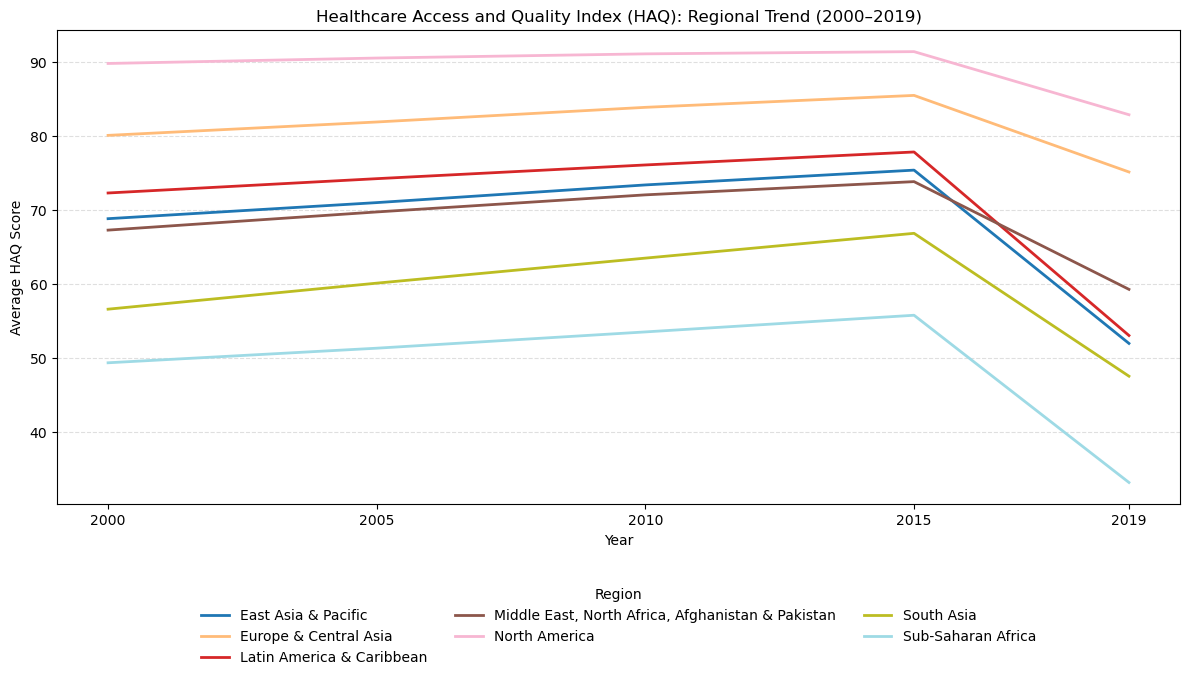

Saved graph as: regional_HAQ_trend.png


In [24]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Ensure Year is numeric
haqr["Year"] = pd.to_numeric(haqr["Year"], errors="coerce").astype(int)

# --- Compute average HAQ per region per year ---
region_year = haqr.groupby(["Region", "Year"])["Healthcare Access and Quality Index (HAQ)"].mean().reset_index()

# --- Plot ---
plt.figure(figsize=(12, 7))

regions = region_year["Region"].unique()
num_regions = len(regions)

# Create distinct colors for each region
colors = cm.get_cmap("tab20", num_regions)

for i, region in enumerate(regions):
    data = region_year[region_year["Region"] == region]
    plt.plot(
        data["Year"],
        data["Healthcare Access and Quality Index (HAQ)"],
        linewidth=2,
        label=region,
        color=colors(i)     # <-- DISTINCT COLOR
    )

plt.title("Healthcare Access and Quality Index (HAQ): Regional Trend (2000–2019)")
plt.xlabel("Year")
plt.ylabel("Average HAQ Score")

# Horizontal grid only
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Force integers on x-axis
years = sorted(haqr["Year"].unique())
plt.xticks(years)

# Legend below the graph
plt.legend(
    title="Region",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False
)

plt.tight_layout()
plt.savefig("regional_HAQ_trendraw.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved graph as: regional_HAQ_trend.png")

In [27]:
labor= pd.read_excel('C:\\Users\\user\\Downloads\\raw labor and region .xlsx')

In [29]:
labor=labor.drop(columns=['Income Group'])

In [30]:
labor.head()

,Entity,Code,Year,Productivity: output per hour worked,Region
0,Albania,ALB,2005,10.353054,Europe & Central Asia
1,Albania,ALB,2006,11.228283,Europe & Central Asia
2,Albania,ALB,2007,11.995945,Europe & Central Asia
3,Albania,ALB,2008,14.754907,Europe & Central Asia
4,Albania,ALB,2009,15.838745,Europe & Central Asia


C:\Users\user\AppData\Local\Temp\ipykernel_5292\859146795.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("tab20", num_countries)


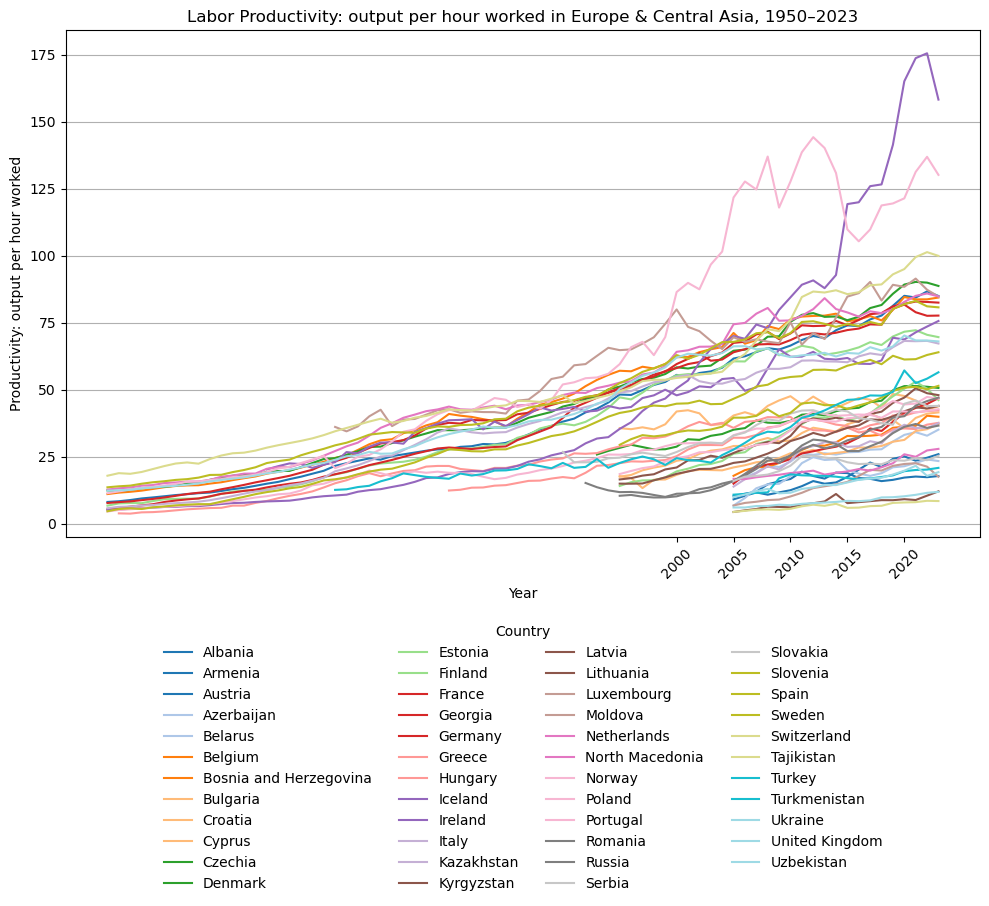

Saved graph as: labor_productivity_Europe_&_Central_Asia.png


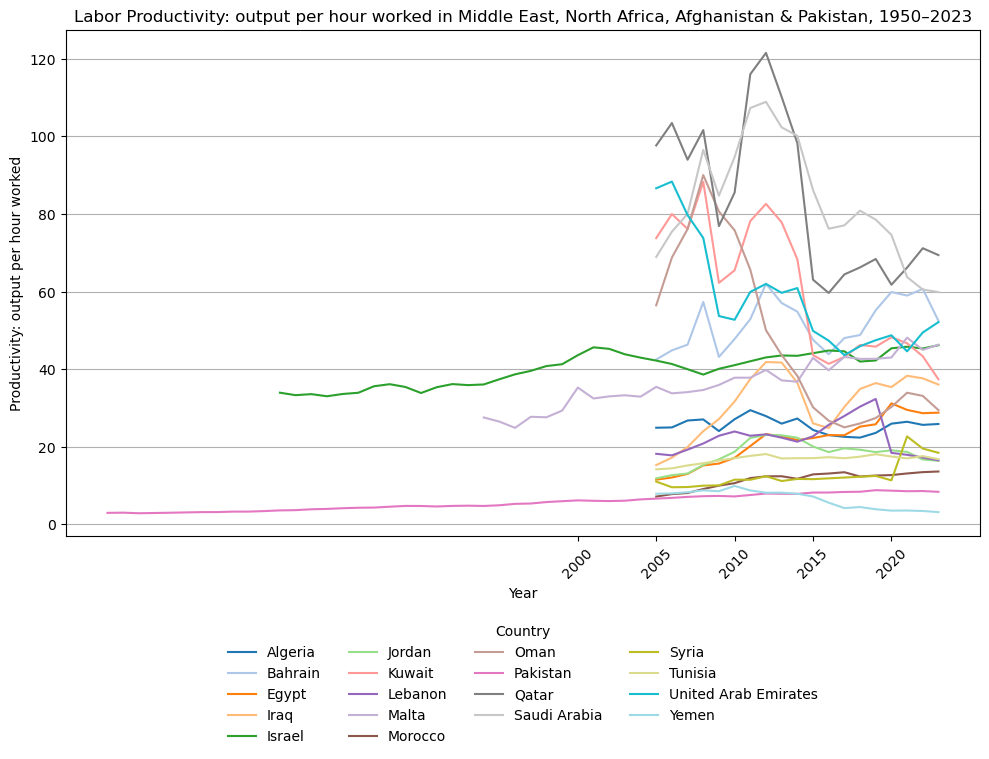

Saved graph as: labor_productivity_Middle_East,_North_Africa,_Afghanistan_&_Pakistan.png


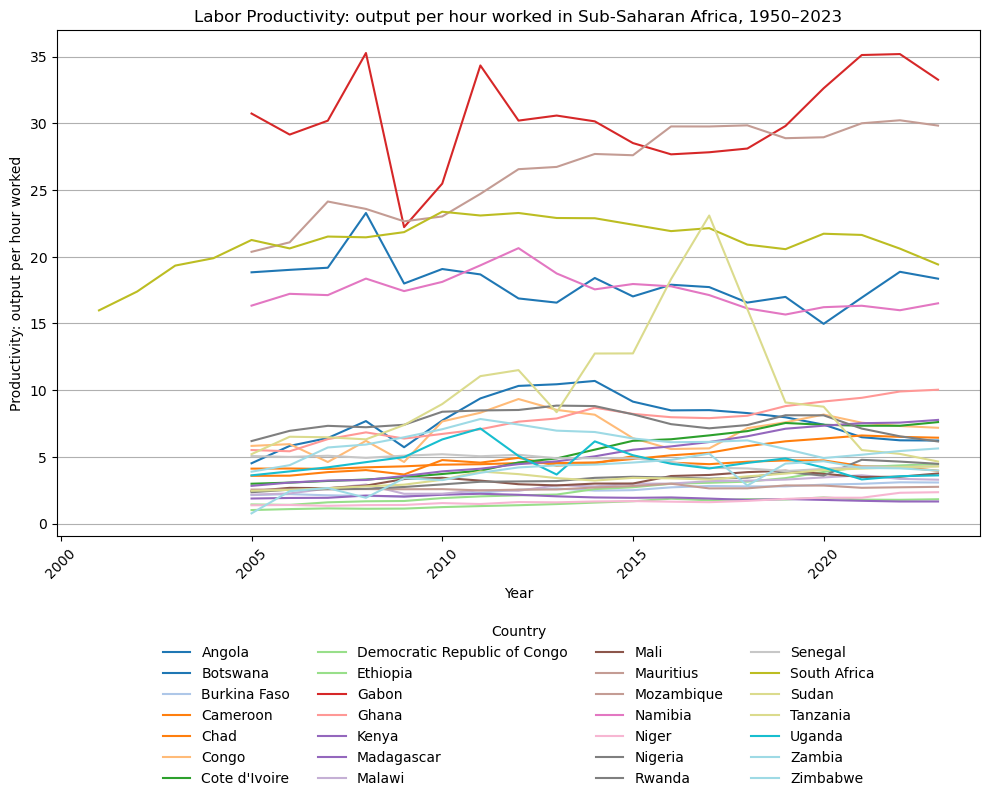

Saved graph as: labor_productivity_Sub-Saharan_Africa.png


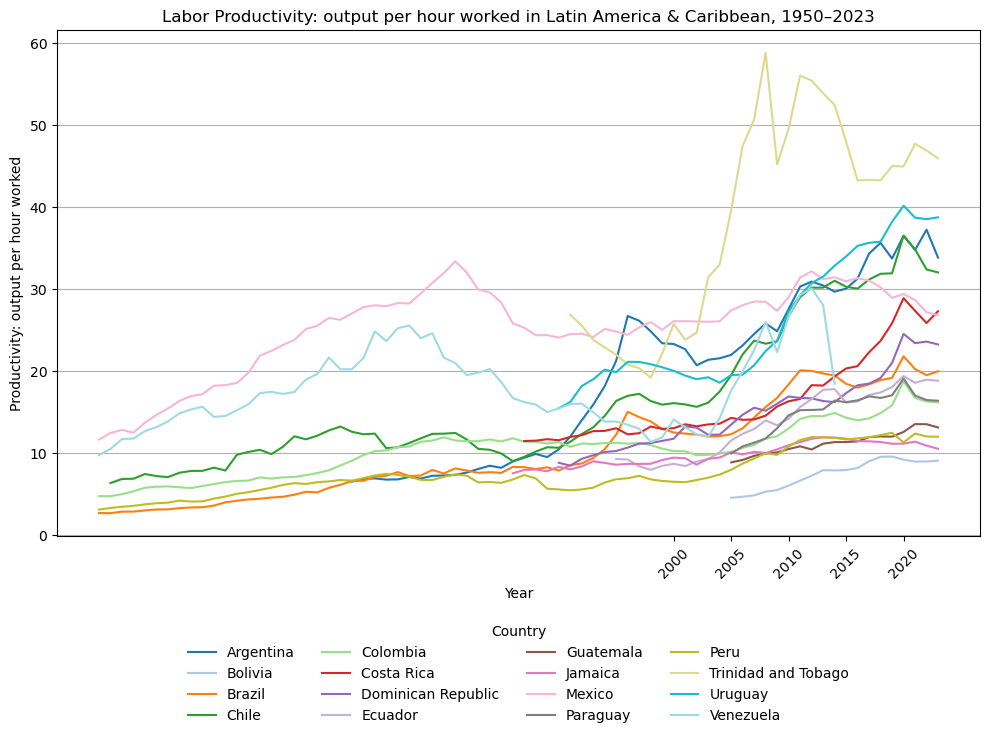

Saved graph as: labor_productivity_Latin_America_&_Caribbean.png


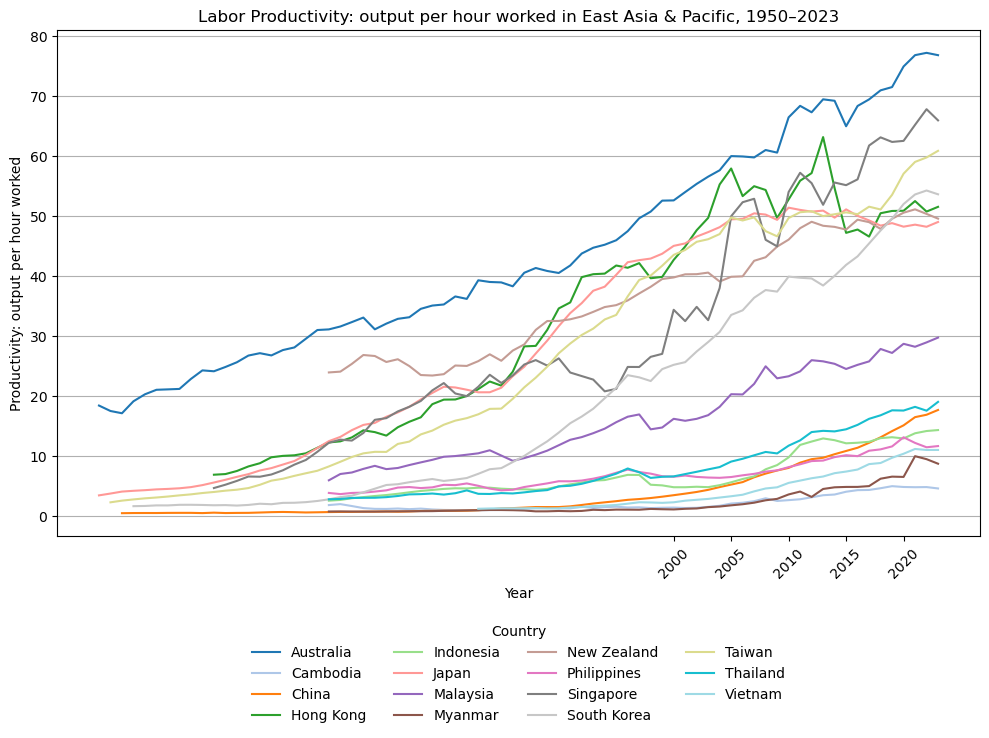

Saved graph as: labor_productivity_East_Asia_&_Pacific.png


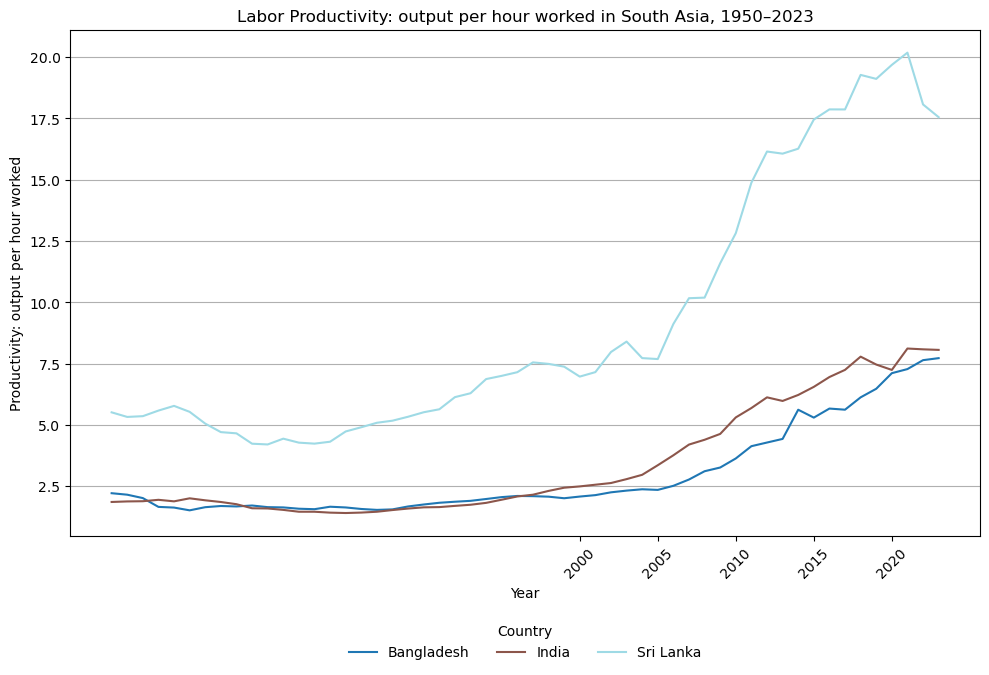

Saved graph as: labor_productivity_South_Asia.png


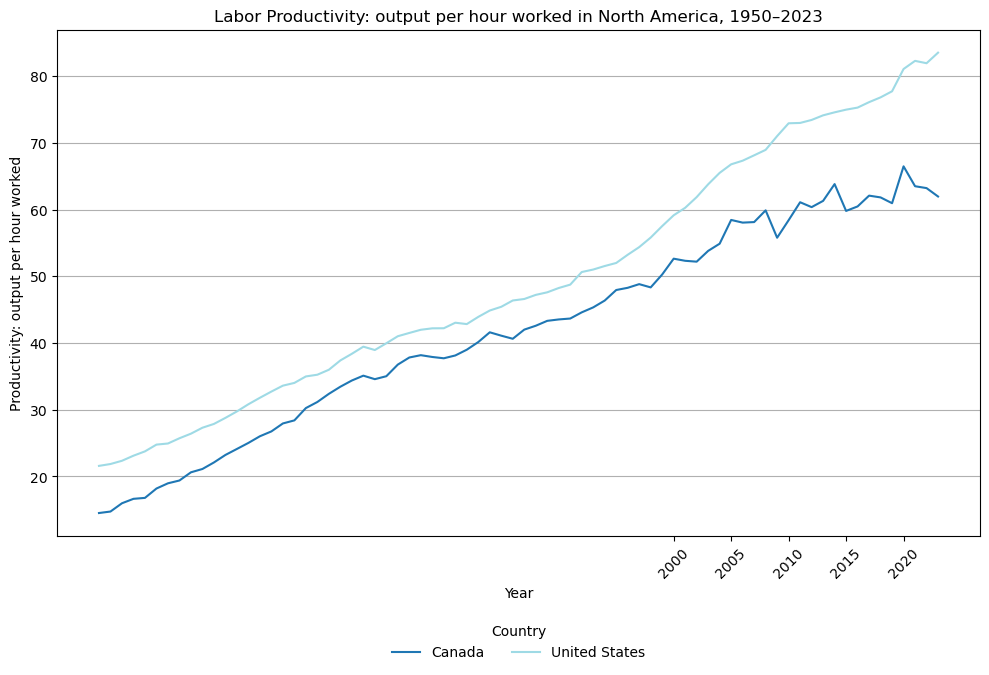

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Saved graph as: labor_productivity_North_America.png


AttributeError: 'float' object has no attribute 'replace'

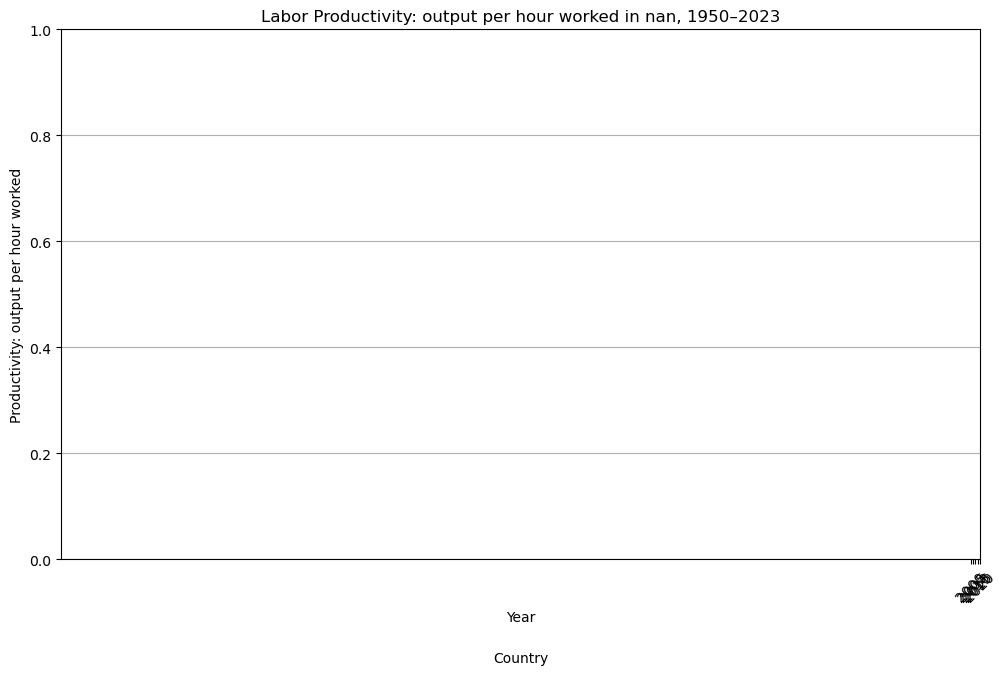

In [33]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Ensure Year is integer
labor["Year"] = pd.to_numeric(labor["Year"], errors="coerce").astype(int)

regions = labor["Region "].unique()

for region in regions:
    regional_data = labor[labor["Region "] == region]

    countries = regional_data["Entity"].unique()
    num_countries = len(countries)

    # Create distinct colors for each country
    colors = cm.get_cmap("tab20", num_countries)

    plt.figure(figsize=(10, 6))

    for i, country in enumerate(countries):
        country_data = regional_data[regional_data["Entity"] == country]

        # Line only – no markers
        plt.plot(
            country_data["Year"],
            country_data["Productivity: output per hour worked"],
            linewidth=1.5,
            label=country,
            color=colors(i)   # <-- DISTINCT COLOR
        )

    # Titles and labels
    plt.title(f"Labor Productivity: output per hour worked in {region}, 1950–2023")
    plt.xlabel("Year")
    plt.ylabel("Productivity: output per hour worked")

    # Force integer ticks
    years = sorted(regional_data["Year"].unique())
    plt.xticks(years)

    plt.grid(True)
    plt.grid(axis='x', linestyle='', alpha=0.5)
    plt.tight_layout()
    plt.xticks(range(2000, 2024, 5), rotation=45)

    # --- LEGEND BELOW THE PLOT ---
    plt.legend(
        title="Country",
        loc="upper center",
        bbox_to_anchor=(0.5, -0.15),
        ncol=4,
        frameon=False
    )

    # --- SAVE THE GRAPH ---
    filename = f"labor_productivity_{region.replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")

    plt.show()

    # --- PRINT CONFIRMATION ---
    print("Saved graph as:", filename)
